https://docs.wradlib.org/en/stable/notebooks/fileio/wradlib_gis_export_example.html?highlight=geotiff#Step-4a:-Export-as-GeoTIFF

### export a gridded dataset in GeoTIFF and ESRI ASCII format. This will be exemplified using RADOLAN data from the German Weather Service.

## Import Modules

In [1]:
import wradlib as wrl
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Step 1: Read the original data

In [2]:
# We will export this RADOLAN dataset to a GIS compatible format
data_raw, meta  = wrl.io.read_radolan_composite("/home/elisabeth/Dokumente/master/2014_07/raa01-sf_10000-1407282350-dwd---bin")




## Step 2: Get the projected coordinates of the RADOLAN grid

In [3]:
# This is the RADOLAN projection
proj_osr = wrl.georef.create_osr("dwd-radolan")

# Get projected RADOLAN coordinates for corner definition
xy_raw = wrl.georef.get_radolan_grid(900, 900)

### We know, that wrl.read_radolan_composite returns a 2D-array (rows, cols) with the origin in the lower left corner. Same applies to wrl.georef.get_radolan_grid. For the next step, we need to flip the data and the coords up-down. The coordinate corner points also need to be adjusted from lower left corner to upper right corner.

In [4]:
data, xy = wrl.georef.set_raster_origin(data_raw, xy_raw, 'upper')

## Step 4a: Export as GeoTIFF

### For RADOLAN grids, this projection will probably not be recognized by ESRI ArcGIS.

In [7]:
# create 3 bands
wdir = "/home/elisabeth/Dokumente/master/2014_01/out/"
data = np.stack((data, data+100, data+1000))
ds = wrl.georef.create_raster_dataset(data, xy, projection=proj_osr)
wrl.io.write_raster_dataset(wdir + "R_2014_07_28.tif", ds, 'GTiff')

## Step 4b: Export as ESRI ASCII file (aka Arc/Info ASCII Grid)

In [8]:
# Export to Arc/Info ASCII Grid format (aka ESRI grid)
#     It should be possible to import this to most conventional
# GIS software.
# only use first band
proj_esri = proj_osr.Clone()
proj_esri.MorphToESRI()
ds = wrl.georef.create_raster_dataset(data[0], xy, projection=proj_esri)
wrl.io.write_raster_dataset(wdir + "2014_07_28.asc", ds, 'AAIGrid', options=['DECIMAL_PRECISION=2'])

## Translate it to Geotiff with gdal in bash console 

In [ ]:
#cd /home/elisabeth/Dokumente/master/2014_01/out/
#!gdal_translate -of "GTiff" 2014_07_28.asc 2014_07_28_translate.tif


## upload to Drive Account

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import os 

g_login = GoogleAuth() 
g_login.LocalWebserverAuth() # Creates local webserver and auto handles authentication.
drive = GoogleDrive(g_login)

InvalidConfigError: Invalid client secrets file ('Error opening file', 'client_secrets.json', 'No such file or directory', 2)

## Step 5a: Read from GeoTIFF

In [9]:
wdir = "/home/elisabeth/Dokumente/master/2014_01/out/"
ds1 = wrl.io.open_raster(wdir + "R_2014_07_28.tif")
data1, xy1, proj1 = wrl.georef.extract_raster_dataset(ds1, nodata=-9999.)
np.testing.assert_array_equal(data1, data)
np.testing.assert_array_equal(xy1[:-1,:-1,:], xy)

In [10]:
#Reproject/Resample given dataset according to keyword arguments
radolan_grid_ll = wrl.georef.get_radolan_grid(900,900, wgs84=True)
new_raster = wrl.georef.raster.reproject_raster_dataset(ds1, spacing=1000.00, projection_target=radolan_grid_ll,align=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Read File & get Metadata

In [2]:
# We will export this RADOLAN dataset to a GIS compatible format
data_raw, meta  = wrl.io.read_radolan_composite("/home/elisabeth/Dokumente/master/2014_07/raa01-sf_10000-1407282350-dwd---bin")
print(data_raw, meta)


[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]] {'producttype': 'SF', 'datetime': datetime.datetime(2014, 7, 28, 23, 50), 'radarid': '10000', 'datasize': 1620000, 'maxrange': '150 km', 'radolanversion': '2.13.1', 'precision': 0.1, 'intervalseconds': 86400, 'nrow': 900, 'ncol': 900, 'radarlocations': ['boo', 'ros', 'emd', 'han', 'umd', 'pro', 'ess', 'drs', 'neu', 'nhb', 'oft', 'tur', 'isn', 'fbg', 'mem'], 'radardays': ['boo 24', 'drs 24', 'emd 24', 'ess 24', 'fbg 24', 'han 24', 'isn 24', 'mem 24', 'neu 24', 'nhb 24', 'oft 24', 'pro 24', 'ros 24', 'tur 24', 'umd 24'], 'nodataflag': -9999, 'secondary': array([   188,    189,    190, ..., 806263, 806264, 807163]), 'cluttermask': array([], dtype=int64)}


## Define Projection and Get Coordinate System (RADOLAN)

In [4]:
# This is the RADOLAN projection
proj_osr = wrl.georef.create_osr("dwd-radolan")
print(proj_osr)
# Get projected RADOLAN coordinates for corner definition
xy_raw = wrl.georef.get_radolan_grid(900, 900, wgs84=True)
print(xy_raw)

PROJCS["Radolan projection",
    GEOGCS["Radolan Coordinate System",
        DATUM["Radolan Kugel",
            SPHEROID["Erdkugel",6370040.0,0.0]],
        PRIMEM["Greenwich",0.0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.017453292519943295],
        AXIS["Longitude",EAST],
        AXIS["Latitude",NORTH]],
    PROJECTION["polar_stereographic"],
    PARAMETER["central_meridian",10.0],
    PARAMETER["latitude_of_origin",60.0],
    PARAMETER["scale_factor",0.9330127019],
    PARAMETER["false_easting",0.0],
    PARAMETER["false_northing",0.0],
    UNIT["m*1000.0",1000.0],
    AXIS["X",EAST],
    AXIS["Y",NORTH]]
[[[ 3.58892995 46.95258041]
  [ 3.60107571 46.95351109]
  [ 3.61322204 46.95444002]
  ...
  [14.58426285 47.07247581]
  [14.59648289 47.07180758]
  [14.6087025  47.07113758]]

 [[ 3.58756495 46.96087117]
  [ 3.59971325 46.9618021 ]
  [ 3.61186212 46.96273128]
  ...
  [14.5852429  47.08079892]
  [14.59746553 47.08013051]
  [14.60968773 47.07946033]]

 [[ 3.5861

## Export as GeoTIFF

In [5]:
data, xy = wrl.georef.set_raster_origin(data_raw, xy_raw, 'upper')
print(data,xy)

[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]] [[[ 2.0735617  54.58826739]
  [ 2.08851211 54.58947266]
  [ 2.10346361 54.59067567]
  ...
  [15.67397575 54.7436644 ]
  [15.68906607 54.74279759]
  [15.70415559 54.74192849]]

 [[ 2.07564265 54.57960294]
  [ 2.09058924 54.58080784]
  [ 2.10553691 54.58201048]
  ...
  [15.67247681 54.73495172]
  [15.6875632  54.73408518]
  [15.70264879 54.73321635]]

 [[ 2.07772252 54.57093887]
  [ 2.09266529 54.57214339]
  [ 2.10760913 54.57334566]
  ...
  [15.67097866 54.72623943]
  [15.68606112 54.72537317]
  [15.70114278 54.72450461]]

 ...

 [[ 3.58619938 46.97838408]
  [ 3.59835022 46.97931526]
  [ 3.61050164 46.98024468]
  ...
  [14.58622337 47.09834418]
  [14.59844858 47.09767559]
  [14.61067338 47.09

In [6]:
# create 3 bands
wdir = "/home/elisabeth/Dokumente/master/2014_01/out/"
data = np.stack((data, data+100, data+1000))
ds = wrl.georef.create_raster_dataset(data, xy, projection=proj_osr)
wrl.io.write_raster_dataset(wdir + "test2.tif", ds, 'GTiff')
print(wdir,data,ds)

/home/elisabeth/Dokumente/master/2014_01/out/ [[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  ...
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]
  [-9999. -9999. -9999. ... -9999. -9999. -9999.]]

 [[-9899. -9899. -9899. ... -9899. -9899. -9899.]
  [-9899. -9899. -9899. ... -9899. -9899. -9899.]
  [-9899. -9899. -9899. ... -9899. -9899. -9899.]
  ...
  [-9899. -9899. -9899. ... -9899. -9899. -9899.]
  [-9899. -9899. -9899. ... -9899. -9899. -9899.]
  [-9899. -9899. -9899. ... -9899. -9899. -9899.]]

 [[-8999. -8999. -8999. ... -8999. -8999. -8999.]
  [-8999. -8999. -8999. ... -8999. -8999. -8999.]
  [-8999. -8999. -8999. ... -8999. -8999. -8999.]
  ...
  [-8999. -8999. -8999. ... -8999. -8999. -8999.]
  [-8999. -8999. -8999. ... -8999. -8999. -8999.]
  [-8999. -8999. -8999. ... -8999. -8999. -8999.]]] <osgeo.gdal.Dataset; proxy of 

## Export as ESRI ASCII file (ASCII GRID)

In [23]:
# Export to Arc/Info ASCII Grid format (aka ESRI grid)
#     It should be possible to import this to most conventional
# GIS software.
# only use first band
proj_esri = proj_osr.Clone()
proj_esri.MorphToESRI()
ds = wrl.georef.create_raster_dataset(data[0], xy, projection=proj_esri)
wrl.io.write_raster_dataset(wdir + "aaigrid.asc", ds, 'AAIGrid', options=['DECIMAL_PRECISION=2'])

# Transform RADOLAN CoordinateSystem

In [24]:
import wradlib as wrl
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np



## 900x900, 1km grid box

In [25]:
radolan_grid_xy = wrl.georef.get_radolan_grid(900,900)
print("{0}, ({1:.4f}, {2:.4f})".format(radolan_grid_xy.shape, *radolan_grid_xy[0,0,:]))
radolan_grid_ll = wrl.georef.get_radolan_grid(900,900, wgs84=True)
print("{0}, ({1:.4f}, {2:.4f})".format(radolan_grid_ll.shape, *radolan_grid_ll[0,0,:]))


(900, 900, 2), (-523.4622, -4658.6447)
(900, 900, 2), (3.5889, 46.9526)


# Grid Reprojection

In [ ]:
 def radolan2lonlat(nx=900,ny=900):
    """Calculates lon/lat coordinates of radolan grid of the German Weather Service

    Returns the latitude and longitude coordinates of the radolan grid positions
    (lower left corner of every pixel). The radolan grid is a polarstereographic
    projection, the projection information was taken from RADOLAN-RADVOR-OP
    Kompositformat_2.2.2

    Corner / Coordinate lon         lat         x           y
    LowerLeft           3,5889E     46,9526N    -523,4622   -4658,645 (km)
    LowerRight          14,6209E    47,0705N    376,5378    -4658,645
    UpperRight          15,7208E    54,7405N    376,5378    -3758,645
    UpperLeft           2,0715E     54,5877N    -523,4622   -3758,645

    Parameters
    ----------
    nx,ny : gridsize (900x900 by default, 1400x1400 possible)

    Returns
    -------
    lon : numpy arrays
        Longitude of gridpoints
    lat : numpy array
        Latitude of gridpoints

    References
    ----------

    .. [DWD2009] Germany Weather Service (DWD), 2011: RADOLAN_RADVOR-OP -
        Beschreibung des Kompositformats, Version 2.2.2. Offenbach, Germany,
        URL: http://dwd.de/radolan (in German)

    """

    xi=np.zeros((nx,ny))
    for i in np.arange(0,nx,1):
        xi[i,:] = np.arange(0, nx,1)


    yi = xi.transpose()

    x = xi - 523.4622   # x0 of radolan grid
    y = yi - 4658.645   # y0 of radolan grid

    rad2deg = 180. / np.pi 
    deg2rad = np.pi / 180.

    lon0 = 10.   # central meridian of projection
    lat0 = 60.   # standard parallel of projection

    sinlat0 = np.sin(lat0*deg2rad)

    fac = (6370.040**2.) * ((1.+sinlat0) **2.)

    lon = np.arctan((-x/y))*rad2deg +lon0
    lat = np.arcsin((fac -(x**2. + y**2.) )/(fac + (x**2. + y**2.)  ) )*rad2deg

    return lon,lat

radolan.py
"radolan.py" wird angezeigt.

In [26]:
from osgeo import osr
proj_stereo = wrl.georef.create_osr("dwd-radolan")
proj_wgs = osr.SpatialReference()
proj_wgs.ImportFromEPSG(4326)
print(proj_wgs)

GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]


### Then, we call reproject with the osr-objects as projection_source and projection_target parameters.

In [27]:
radolan_grid_xy = wrl.georef.get_radolan_grid(900,900)
radolan_grid_ll = wrl.georef.reproject(radolan_grid_xy, projection_source=proj_stereo, projection_target=proj_wgs)
print("{0}, ({1:.4f}, {2:.4f})".format(radolan_grid_ll.shape, *radolan_grid_ll[0,0,:]))

(900, 900, 2), (3.5889, 46.9526)


In [1]:
import wradlib as wrl
import matplotlib.pyplot as pl
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np
from osgeo import osr

In [3]:
def get_radar_locations():
    radars = {}
    radar = {'name': 'ASR Dresden', 'wmo': 10487, 'lon': 13.76347,
             'lat': 51.12404, 'alt': 261}
    radars['ASD'] = radar

    radar = {'name': 'Boostedt', 'wmo': 10132, 'lon': 10.04687,
             'lat': 54.00438, 'alt': 124.56}
    radars['BOO'] = radar

    radar = {'name': 'Dresden', 'wmo': 10488, 'lon': 13.76865, 'lat': 51.12465,
             'alt': 263.36}
    radars['DRS'] = radar

    radar = {'name': 'Eisberg', 'wmo': 10780, 'lon': 12.40278, 'lat': 49.54066,
             'alt': 798.79}
    radars['EIS'] = radar

    radar = {'name': 'Emden', 'wmo': 10204, 'lon': 7.02377, 'lat': 53.33872,
             'alt': 58}
    radars['EMD'] = radar

    radar = {'name': 'Essen', 'wmo': 10410, 'lon': 6.96712, 'lat': 51.40563,
             'alt': 185.10}
    radars['ESS'] = radar

    radar = {'name': 'Feldberg', 'wmo': 10908, 'lon': 8.00361, 'lat': 47.87361,
             'alt': 1516.10}
    radars['FBG'] = radar

    radar = {'name': 'Flechtdorf', 'wmo': 10440, 'lon': 8.802, 'lat': 51.3112,
             'alt': 627.88}
    radars['FLD'] = radar

    radar = {'name': 'Hannover', 'wmo': 10339, 'lon': 9.69452, 'lat': 52.46008,
             'alt': 97.66}
    radars['HNR'] = radar

    radar = {'name': 'Neuhaus', 'wmo': 10557, 'lon': 11.13504, 'lat': 50.50012,
             'alt': 878.04}
    radars['NEU'] = radar

    radar = {'name': 'Neuheilenbach', 'wmo': 10605, 'lon': 6.54853,
             'lat': 50.10965, 'alt': 585.84}
    radars['NHB'] = radar

    radar = {'name': 'Offenthal', 'wmo': 10629, 'lon': 8.71293, 'lat': 49.9847,
             'alt': 245.80}
    radars['OFT'] = radar

    radar = {'name': 'Proetzel', 'wmo': 10392, 'lon': 13.85821,
             'lat': 52.64867, 'alt': 193.92}
    radars['PRO'] = radar

    radar = {'name': 'Memmingen', 'wmo': 10950, 'lon': 10.21924,
             'lat': 48.04214, 'alt': 724.40}
    radars['MEM'] = radar

    radar = {'name': 'Rostock', 'wmo': 10169, 'lon': 12.05808, 'lat': 54.17566,
             'alt': 37}
    radars['ROS'] = radar

    radar = {'name': 'Isen', 'wmo': 10873, 'lon': 12.10177, 'lat': 48.1747,
             'alt': 677.77}
    radars['ISN'] = radar

    radar = {'name': 'Tuerkheim', 'wmo': 10832, 'lon': 9.78278,
             'lat': 48.58528, 'alt': 767.62}
    radars['TUR'] = radar

    radar = {'name': 'Ummendorf', 'wmo': 10356, 'lon': 11.17609,
             'lat': 52.16009, 'alt': 183}
    radars['UMM'] = radar

    return radars

In [2]:
# load radolan file
rw_filename = wrl.util.get_wradlib_data_file("/home/elisabeth/Dokumente/master/2014_01/raa01-sf_10000-1401010050-dwd---bin.gz")
rwdata, rwattrs = wrl.io.read_radolan_composite(rw_filename)

In [3]:

# print the available attributes
print("RW Attributes:", rwattrs)



RW Attributes: {'producttype': 'SF', 'datetime': datetime.datetime(2014, 1, 1, 0, 50), 'radarid': '10000', 'datasize': 1620000, 'maxrange': '150 km', 'radolanversion': '2.13.1', 'precision': 0.1, 'intervalseconds': 86400, 'nrow': 900, 'ncol': 900, 'radarlocations': ['asw', 'ham', 'emd', 'han', 'umd', 'ess', 'fld', 'drs', 'neu', 'oft', 'eis', 'tur', 'muc', 'fbg', 'mem'], 'radardays': ['asw 24', 'drs 24', 'eis 24', 'emd 24', 'ess 24', 'fbg 24', 'fld 24', 'ham 24', 'han 24', 'mem 24', 'muc 24', 'neu 24', 'oft 24', 'tur 24', 'umd 24'], 'nodataflag': -9999, 'secondary': array([   188,    189,    190, ..., 809571, 809572, 809573]), 'cluttermask': array([], dtype=int64)}


In [4]:
# mask data
sec = rwattrs['secondary']
rwdata.flat[sec] = -9999
rwdata = np.ma.masked_equal(rwdata, -9999)

# create radolan projection object
proj_stereo = wrl.georef.create_osr("dwd-radolan")

# create wgs84 projection object
proj_wgs = osr.SpatialReference()
proj_wgs.ImportFromEPSG(4326)

# get radolan grid
radolan_grid_xy = wrl.georef.get_radolan_grid(900, 900)
x1 = radolan_grid_xy[:, :, 0]
y1 = radolan_grid_xy[:, :, 1]

# convert to lonlat
radolan_grid_ll = wrl.georef.reproject(radolan_grid_xy,
                                       projection_source=proj_stereo,
                                       projection_target=proj_wgs)
lon1 = radolan_grid_ll[:, :, 0]
lat1 = radolan_grid_ll[:, :, 1]
print(radolan_grid_ll)

[[[ 3.58892995 46.95258041]
  [ 3.60107571 46.95351109]
  [ 3.61322204 46.95444002]
  ...
  [14.58426285 47.07247581]
  [14.59648289 47.07180758]
  [14.6087025  47.07113758]]

 [[ 3.58756495 46.96087117]
  [ 3.59971325 46.9618021 ]
  [ 3.61186212 46.96273128]
  ...
  [14.5852429  47.08079892]
  [14.59746553 47.08013051]
  [14.60968773 47.07946033]]

 [[ 3.58619938 46.96916238]
  [ 3.59835022 46.97009356]
  [ 3.61050164 46.97102299]
  ...
  [14.58622337 47.08912249]
  [14.59844858 47.0884539 ]
  [14.61067338 47.08778353]]

 ...

 [[ 2.07772252 54.56171718]
  [ 2.09266529 54.5629217 ]
  [ 2.10760913 54.56412397]
  ...
  [15.67097866 54.71701774]
  [15.68606112 54.71615147]
  [15.70114278 54.71528292]]

 [[ 2.07564265 54.57038125]
  [ 2.09058924 54.57158615]
  [ 2.10553691 54.57278879]
  ...
  [15.67247681 54.72573003]
  [15.6875632  54.72486349]
  [15.70264879 54.72399466]]

 [[ 2.0735617  54.5790457 ]
  [ 2.08851211 54.58025097]
  [ 2.10346361 54.58145398]
  ...
  [15.67397575 54.734442

In [6]:
# range array 150 km
print("Max Range: ", rwattrs['maxrange'])
r = np.arange(1, 151) * 1000
# azimuth array 1 degree spacing
az = np.linspace(0, 360, 361)[0:-1]

Max Range:  150 km


In [7]:
# get radar dict
radars = get_radar_locations()

In [8]:
def plot_radar(radar, ax, proj):

    site = (radar['lon'], radar['lat'], radar['alt'] )

    # build polygons for maxrange rangering
    polygons = wrl.georef.spherical_to_polyvert(r, az, 0,
                                                site,
                                                proj=proj)
    polygons = polygons[..., 0:2]
    polygons.shape = (len(az), len(r), 5, 2)
    polygons = polygons[:, -1, :, :]

    x_loc, y_loc = wrl.georef.reproject(site[0], site[1],
                                        projection_source=proj_wgs,
                                        projection_target=proj)


    # create PolyCollections and add to respective axes
    polycoll = mpl.collections.PolyCollection(polygons, closed=True,
                                              edgecolors='r',
                                              facecolors='r')
    ax.add_collection(polycoll, autolim=True)

    # plot radar location and information text
    ax.plot(x_loc, y_loc, 'r+')
    ax.text(x_loc, y_loc, radar['name'], color='r')

NameError: name 'radars' is not defined

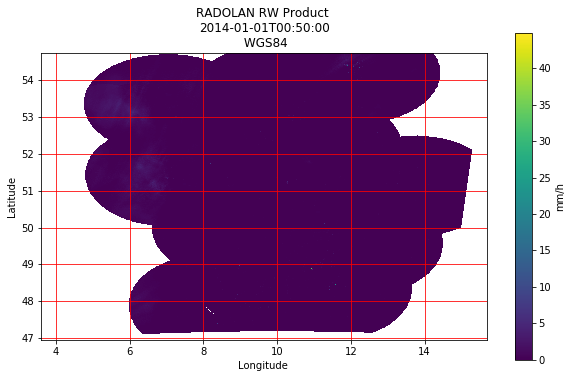

In [5]:
# plot two projections side by side
fig1 = pl.figure(figsize=(10,8))
ax1 = fig1.add_subplot(111, aspect='equal')
pm = ax1.pcolormesh(lon1, lat1, rwdata, cmap='viridis')
cb = fig1.colorbar(pm, shrink=0.75)
cb.set_label("mm/h")
pl.xlabel("Longitude ")
pl.ylabel("Latitude")
pl.title(
    'RADOLAN RW Product \n' + rwattrs['datetime'].isoformat() + '\n WGS84')
pl.xlim((lon1[0, 0], lon1[-1, -1]))
pl.ylim((lat1[0, 0], lat1[-1, -1]))
pl.grid(color='r')
for radar_id in rwattrs['radarlocations']:
    # get radar coords etc from dict
    # repair Ummendorf ID
    if radar_id == 'umd':
        radar_id = 'umm'
    radar = radars[radar_id.upper()]
    plot_radar(radar, ax1, proj_wgs)

In [12]:
data_raw, meta  = wrl.io.read_radolan_composite("/home/elisabeth/Dokumente/master/2014_01/raa01-sf_10000-1401010050-dwd---bin.gz")
# This is the RADOLAN projection
proj_osr = wrl.georef.create_osr("dwd-radolan")
print(proj_osr)
# Get projected RADOLAN coordinates for corner definition
xy_raw = wrl.georef.get_radolan_grid(900, 900)
print(xy_raw)
data, xy = wrl.georef.set_raster_origin(data_raw, radolan_grid_ll, 'upper')
print(data,xy)
# create 3 bands
wdir = "/home/elisabeth/Dokumente/master/2014_01/out/"
data = np.stack((data, data+100, data+1000))
ds = wrl.georef.create_raster_dataset(data, xy, projection=proj_osr)
wrl.io.write_raster_dataset(wdir + "geotiff.tif", ds, 'GTiff')
print(wdir,data,ds)

PROJCS["Radolan projection",
    GEOGCS["Radolan Coordinate System",
        DATUM["Radolan Kugel",
            SPHEROID["Erdkugel",6370040.0,0.0]],
        PRIMEM["Greenwich",0.0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.017453292519943295],
        AXIS["Longitude",EAST],
        AXIS["Latitude",NORTH]],
    PROJECTION["polar_stereographic"],
    PARAMETER["central_meridian",10.0],
    PARAMETER["latitude_of_origin",60.0],
    PARAMETER["scale_factor",0.9330127019],
    PARAMETER["false_easting",0.0],
    PARAMETER["false_northing",0.0],
    UNIT["m*1000.0",1000.0],
    AXIS["X",EAST],
    AXIS["Y",NORTH]]
[[[ -523.46216692 -4658.64472427]
  [ -522.46216692 -4658.64472427]
  [ -521.46216692 -4658.64472427]
  ...
  [  373.53783308 -4658.64472427]
  [  374.53783308 -4658.64472427]
  [  375.53783308 -4658.64472427]]

 [[ -523.46216692 -4657.64472427]
  [ -522.46216692 -4657.64472427]
  [ -521.46216692 -4657.64472427]
  ...
  [  373.53783308 -4657.64472427]
  [  374